<a href="https://colab.research.google.com/github/mariamb81/pattern-recognition-coursework/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
np.round([0.89881845, 0.89240089, 0.8899952, 0.89557342, 0.89263436], 3)
np.round([0.89438014, 0.89138128, 0.88987524, 0.89509357, 0.88939539], 3)

array([0.894, 0.891, 0.89 , 0.895, 0.889])

dependencies
- pip install nltk
- pip install wordcloud  
- pip install imbalanced-learn


1. data processing [15pts] (Also analyze and describe your dataset here)
2. model(s) training [5pts]
3. model(s) validation [5pts]
4. model(s) assessment [5pts]

In [ ]:
# plotting settings
def refresh():
    plt.show()
    plt.close()

# 1. Data Processing

### Data Cleaning
Following a typical NLP ML model pipeline inspired by Raghunathan

Sources (https://towardsdatascience.com/nlp-in-python-data-cleaning-6313a404a470, https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/)

#### Overall Plan

##### Reduction

- Remove unnessary features from dataset and deal with missing data
- Remove punctuation
- Remove stop words
- Remove URL's
- Remove HTML tags
- Remove numbers
- Remove extra whitespaces

##### Normalization

- Lemmatize/Stem
- Tokenization
- Lowercasinga404a470)

In [ ]:
# load dataset
df = pd.read_csv("emotions.csv")

In [ ]:
len(df)

416809

#### Reduction

In [ ]:
# remove extra column
df.drop('Unnamed: 0', axis=1, inplace=True)
# see result
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
import string
import re
# regex expressions
# remove punctuation
reg_expr = {'punctuation_re': '[^\w\s]',
           'html_tags_re': 'http\S+',
           'extra_whitespace_re': '\s+',
           'numeric_re': '\d+',
           'non_alphanumeric': '[^a-zA-Z\s]'}
def remove_pattern(text, re_expr, sub_val=''):
    # Define regular expression pattern to match re_expr
    pattern = re.compile(rf'{re_expr}')
    # Replace pattern with an empty string
    text_without_pattern = pattern.sub(sub_val, text)
    return text_without_pattern

In [ ]:
# apply (reduction category) cleaning techniques to each row in dataset
def reduction(df):
    for op in reg_expr.values():
        if op == reg_expr['extra_whitespace_re']:
            # replace with one space when removing extra whitespace
            df['text'] = df.text.apply(lambda x: remove_pattern(x, op, " "))
        else:
            # apply cleaning operation to all text
            df['text'] = df.text.apply(lambda x: remove_pattern(x, op))
    return df

df = reduction(df)
# show result
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


#### Lowercasing

In [ ]:
# change all text to lowercase
df['text'] = df['text'].apply(lambda x: str.lower(x))
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


#### Removing Stop Words

using the NLTK library (https://www.nltk.org/index.html)

In [ ]:
import nltk
from nltk.corpus import stopwords
# download
nltk.download('stopwords')

# remove stop words using NLTK
stop_words = stopwords.words('english')
df['text'] = df.text.apply(lambda x: " ".join(w for w in x.split() if w not in stop_words))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


#### Tokenization

Splitting string into a list of words

In [ ]:
def tokenize(sentence):
    return sentence.split()
df['text'] = df.text.apply(lambda x: tokenize(x))
df.head()

,text,label
0,"[feel, really, helpless, heavy, hearted]",4
1,"[ive, enjoyed, able, slouch, relax, unwind, fr...",0
2,"[gave, internship, dmrg, feeling, distraught]",4
3,"[dont, know, feel, lost]",0
4,"[kindergarten, teacher, thoroughly, weary, job...",4


#### Stemming

did not improve the accuracy of the model so it was excluded

In [ ]:
# from nltk.stem import PorterStemmer
# # Stemming
# # converting all words to their root word
# # download
# nltk.download('punkt')
# st = nltk.PorterStemmer()

# df['text'] = df.text.apply(lambda x: [st.stem(w) for w in x])
# df.head()

# 2. Model Training

In [ ]:
# convert tokenized data back to sentences for use with sklearn
df['text'] = df.text.apply(lambda x: " ".join(x))

In [ ]:
X = df.text
y = df.label

### Test-Train Split
- Using the 60:20:20 split for training, validation and testing mentioned from class

In [ ]:
from sklearn.model_selection import train_test_split
# train test split only splits into two, so it will be used twice to create the desired split
# the function also automatically performs shuffling on the dataset before splitting and balances classes
# create split for test data (20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.20

### Feature Extraction

Converting words to a vector that can be processed using our selected ML models

Possible Techniques
- One Hot Encoding
- Bag of Words
- Term Frequency - Inverse Document Frequency TF-IDF
- Word2Vec (word embedding)
Source (https://www.analyticsvidhya.com/blog/2022/05/a-complete-guide-on-feature-extraction-techniques/, https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(dtype='float32')

# fit and vectorize training data
X_train = vectorizer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2072: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  warnings.warn(


In [ ]:
X_train

<250085x59047 sparse matrix of type '<class 'numpy.float32'>'
	with 2262463 stored elements in Compressed Sparse Row format>

### Ensuring Class Balance - Sampling
- To balance classes in the training set, undersampling was used
- Although this may result in lost information, oversampling a dataset of this size would significantly increase computing time


Text(0.5, 1.0, 'Class distribution - undersampling')

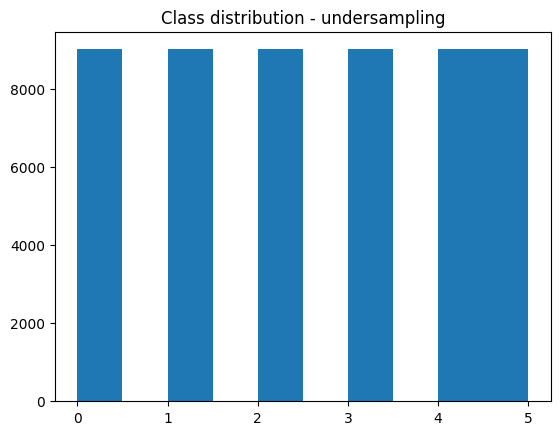

In [ ]:
# Random Under-sampling Technique) to synthetically create new examples of the minority class.
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit RandomUnderSampler to the training data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Now, X and y have more balanced classes
plt.hist(y_train_undersampled)
plt.title("Class distribution - undersampling")

In [ ]:
# print(f"{len(X_train)/len(df)}")
# print(f"{len(X_test)/len(df)}")
# print(f"{len(X_val)/len(df)}")
# print(X_train)

Text(0.5, 1.0, 'Class Distribution: Train-Test-Validation Split')

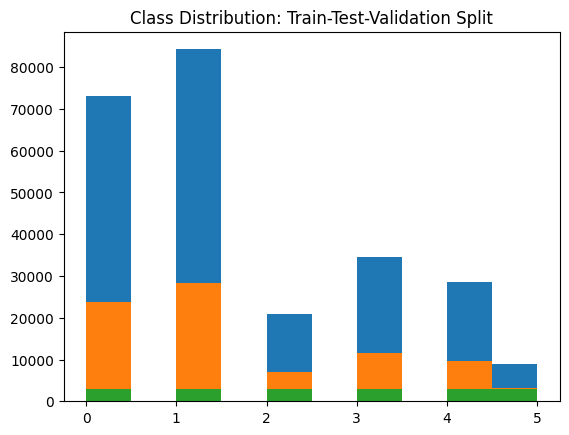

In [ ]:
plt.hist(y_train)
plt.hist(y_test)
plt.hist(y_val)
plt.title("Class Distribution: Train-Test-Validation Split")

### Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(max_depth=10, random_state=100, n_jobs=-1, class_weight='balanced')
# rf_model.fit(X_train_undersampled, y_train_undersampled)

### Support Vector Machine Model
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# from sklearn import svm
# # train SVM model using best parameters
svm_model = svm.SVC(C=1, kernel='linear')
svm_model.fit(X_train_undersampled, y_train_undersampled)

SVC(C=1, kernel='linear')

# 3. Model Validation

### Model selection


In [ ]:
# transform validation set
X_val_vec = vectorizer.transform(X_val)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_val_vec, y_val = rus.fit_resample(X_val_vec, y_val)

# make prediction
# svm_y_pred_val = svm_model.predict(X_val_vec)

# rf_y_pred_val = rf_model.predict(X_val_vec)

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
models = [RandomForestClassifier(random_state=0), svm.SVC(kernel='linear'), 0]

CV accuracies for SVC(kernel='linear'): [0.89881845 0.89240089 0.8899952  0.89557342 0.89263436]


CV score of SVC(kernel='linear'): 89.38844623400112

CV accuracies for RandomForestClassifier(random_state=0): [0.89438014 0.89138128 0.88987524 0.89509357 0.88939539]

CV score of RandomForestClassifier(random_state=0): 89.20251228237686


In [ ]:
# perform 5 fold Cross Validation to determine the highest scoring classifier
# from sklearn.model_selection import cross_val_score
# def cv_model_comparison():
#   for model in models:
#     cv_score = cross_val_score(model, X_val_vec, y_val, cv=5)
#     mean_accuracy = (sum(cv_score)/len(cv_score))*100
#     print(f"CV accuracies for {model}: {cv_score}")
#     print(f"CV score of {model}: {mean_accuracy}")
#     print("-------------------------------------------")

# cv_model_comparison()

### Hyper parameter tuning

In [ ]:
# comparing different hyperparameters for SVC

# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_val_vec, y_val)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
print(pd.DataFrame(clf.cv_results_))
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [ ]:
# did not have enough time to run and get results
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [200, 500],
#     'max_features': ['', 'sqrt', 'log2'],
#     'max_depth' : [50, 75, 100],
#     'criterion' :['gini', 'entropy']
# }
# rfc = RandomForestClassifier(random_state=100)
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_val_vec, y_val)

KeyboardInterrupt: 

In [ ]:
# pd.DataFrame(clf.cv_results_)
# print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


Create Validation Curve for Random Forest Classifier (less computationally expensive compared to GridSearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html


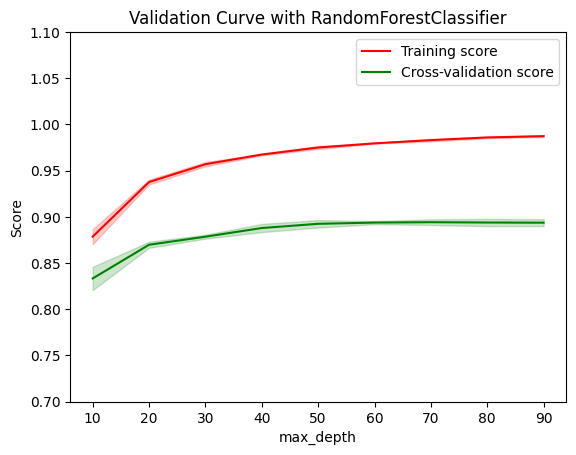

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Example dataset
X_class, y_class = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Define range of values for the hyperparameter 'max_depth'
param_range = np.arange(10, 100, 10)

# Create validation curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X_val_vec, y_val, param_name="max_depth", param_range=param_range,
    cv=3, scoring="accuracy", n_jobs=-1)

# Calculate means and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve - RandomForestClassifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
plt.xticks(param_range)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)
plt.legend(loc="best")
plt.show()


In [ ]:
# print(len(svm_y_pred_val[svm_y_pred_val == 0]))

# 4. Model Assessment

- Accuracy Score
- Classification Report (precision, recall, f1-score, support)
- Confusion Matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay


In [ ]:
# transform validation set
X_test_vec = vectorizer.transform(X_test)
# make prediction
svm_y_pred_test = svm_model.predict(X_test_vec)

# rf_y_pred_val = rf_model.predict(X_val_vec)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# create function to perform model assessment
def model_assessment(y_pred, y_true, labels):
  print(accuracy_score(y_true, y_pred))
  print(classification_report(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred, labels=labels, normalize="true")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot()
  plt.show()
  plt.close()
  # refresh()

[4, 0, 2, 1, 5, 3]
0.8872267939828699
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     23847
           1       0.98      0.85      0.91     28305
           2       0.69      0.97      0.81      6944
           3       0.88      0.92      0.90     11474
           4       0.84      0.86      0.85      9728
           5       0.62      0.98      0.76      3064

    accuracy                           0.89     83362
   macro avg       0.83      0.91      0.86     83362
weighted avg       0.91      0.89      0.89     83362



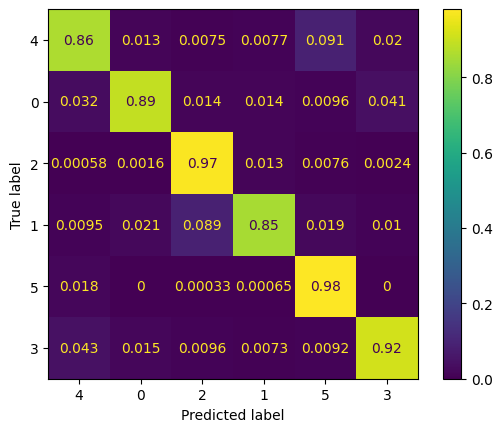

NameError: name 'svm_y_pred_val' is not defined

In [ ]:
labels = list(df.label.unique())
print(labels)
model_assessment(svm_y_pred_test, y_test, df.label.unique())
model_assessment(svm_y_pred_val, y_val, df.label.unique())

# model_assessment(rf_y_pred_val, y_val, df.label.unique())